# Double 7's Intra (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY makes an intraday X-day low, buy.
    3. If the SPY makes an intraday X-day high, sell your long position.
    
    (optimize the number of days)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()
use_adj = False

Define high low trade periods

In [4]:
periods = range(3, 16)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, use_adj, int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

3 4 5 6 7 8 9 10 11 12 13 14 15 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15
annual_return_rate,4.90,4.58,6.75,6.35,7.33,6.96,6.20,6.15,6.17,6.09,6.19,5.74,5.55
max_closed_out_drawdown,-33.84,-32.39,-32.73,-32.60,-32.16,-32.09,-32.14,-31.59,-31.45,-30.99,-30.98,-31.03,-31.14
drawdown_annualized_return,-6.91,-7.08,-4.85,-5.13,-4.39,-4.61,-5.18,-5.13,-5.10,-5.09,-5.01,-5.41,-5.61
drawdown_recovery,-2.14,-0.16,-0.16,-0.16,-0.09,-0.09,-0.09,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08
best_month,11.87,11.06,10.43,11.51,11.60,11.81,14.40,14.41,14.32,14.54,14.54,14.57,14.65
worst_month,-29.51,-31.08,-31.10,-31.09,-31.13,-31.06,-31.11,-31.13,-30.99,-30.99,-30.98,-31.03,-31.14
sharpe_ratio,0.56,0.53,0.75,0.70,0.79,0.75,0.68,0.68,0.68,0.66,0.68,0.65,0.63
sortino_ratio,0.51,0.48,0.68,0.63,0.71,0.67,0.61,0.60,0.61,0.59,0.59,0.55,0.53
monthly_std,2.80,2.68,2.64,2.56,2.54,2.51,2.57,2.59,2.58,2.56,2.50,2.42,2.44
pct_time_in_market,47.60,45.90,44.54,43.51,42.79,42.28,41.88,41.48,40.99,40.45,38.69,37.57,36.42


Bar graphs

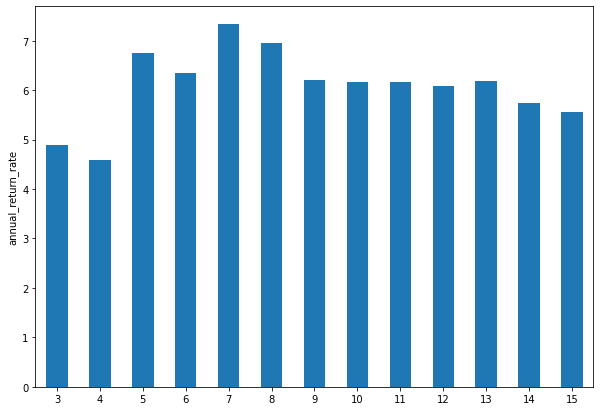

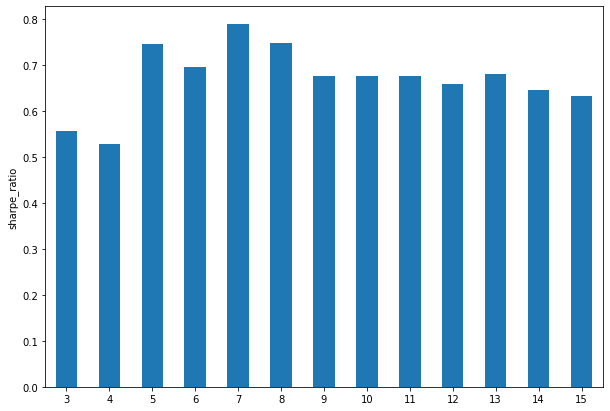

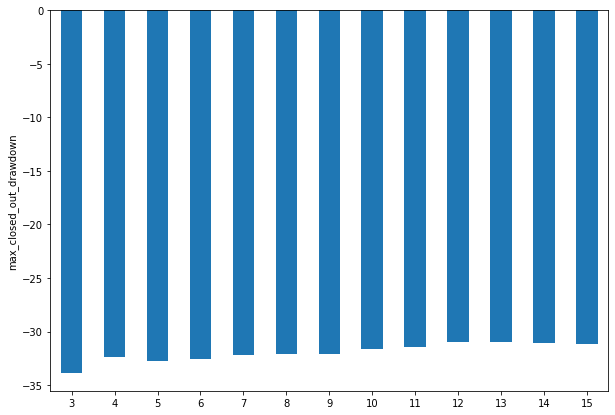

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end, s._use_adj)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-06-22 00:00:00 SELL 215 SPY @ 310.62


Equity curve

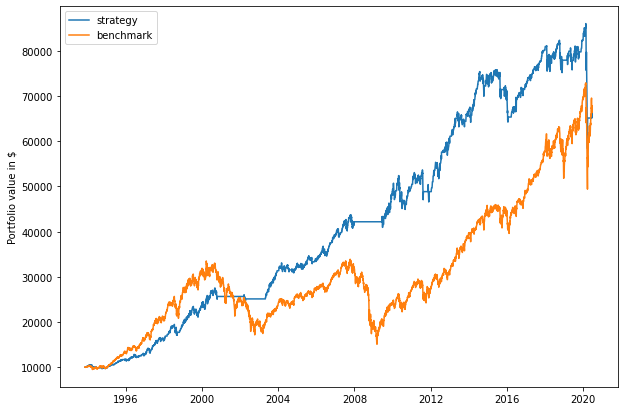

In [9]:
pf.plot_equity_curve(strategies['7'].dbal, benchmark=benchmark.dbal)